# Lanczos method

In [Meurant,2006](#meurant2006) we read:

*This numerical method was introduced by Cornelius Lanczos (see the biographical notes
in the appendix) in 1950 [108]. We should mention in passing that this paper is still worth
reading more than half a century later. The algorithm was intended to compute the coefficients of the characteristic polynomial of a matrix as a mean to compute the eigenvalues of
a symmetric matrix as it was common in those days. The Lanczos algorithm is a projection
method on a Krylov subspace [106]. The Krylov subspace $\mathcal{K}_k(v, A)$ of order $k$ based on the
vector $v$ and the matrix $A$ of order $n$ is $\operatorname{span}\{v, Av,..., A^{k-1} v\}$. Lanczos first introduced
a method using these basis vectors. He noticed that, even though this was an improvement
over previous methods, this can lead to very severe coefficient growth problems when the
condition number of the matrix is large (by 1950 standards). This led him to propose a
method he called "minimized iterations," which is what we now call the Lanczos algorithm
(although he used a different normalization). This method computed an orthogonal basis of
the Krylov subspace. Lanczos in a footnote attributed the successive orthogonalization of
a set of vectors to O. Szaz (1910), a Hungarian mathematician. However, this process that
we now call the Gram-Schmidt algorithm was introduced for sets of functions by J.P. Gram
(1883) and E. Schmidt (1907), although there is a mostly unnoticed result of Laplace on this
subject (1820) and this was also essentially used by Cauchy in 1836. According to Stewart
[178] it was used by G. Kowalevski for finite dimensional spaces in 1909. Actually, in his
1950 paper Lanczos also introduced the nonsymmetric Lanczos method for nonsymmetric
matrices using two sets of biorthogonal vectors defined with the help of AT. He noticed the
connection of his method with orthogonal polynomials and the problems of rounding errors,
mentioning that the problem can be solved by full reorthogonalization of the computed basis
vectors.*


Here's a brief overview of the Lanczos algorithm:

1. **Initialization:** Choose a starting vector $ v_1 $ (usually a random vector or a vector with predetermined properties) and normalize it.

2. **Iterative Process:** Generate a sequence of vectors $ v_2, \ldots, v_k $ by iteratively applying the Lanczos iteration:
   - a. Compute $ Av_k $ (where $ A $ is the original symmetric matrix).
   - b. Apply the Gram-Schmidt process to orthogonalize $ Av_k $ against $ v_k$.
   - c. Compute the coefficients $ \alpha_k $ and $ \beta_k $ such that $ Av_k = \alpha_k v_k + \beta_{k-1} v_{k-1} $ and $ \beta_k = ||Av_k|| $.

3. **Tridiagonalization:** After a certain number of iterations or when desired accuracy is achieved, construct the tridiagonal matrix $ T $ using the coefficients $ \alpha_k $ and $ \beta_k $.



First five eigenvalues of A: [-8.074264153145641 -7.294974113407    -7.09999456487201
 -6.839493796199337 -6.594024679929141]
Last five eigenvalues of A: [  6.930972315448511   7.062199294185393   7.293020558953049
   7.675825643334865 100.25091762351026 ]
First five eigenvalues of T: [-8.043336185191697  -6.611119727786602  -4.572113822918649
 -2.689048037839803  -0.2636155222127254]
Last five eigenvalues of T: [  2.3053401873210446   4.4059186595285915   6.352024236217902
   7.448095199140632  100.25091762351002  ]


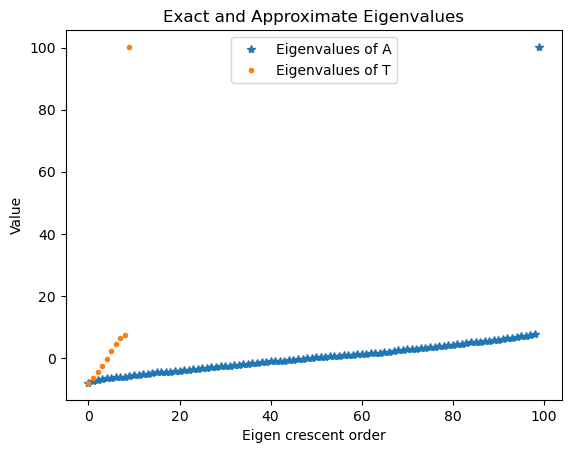

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def lanczos_algorithm(matrix, vector, max_iterations=100, kry=10):
    # version of Meurant's book, p. 8
    
    # Initialize variables
    [m, n]=matrix.shape
    maxiter=min(m,max_iterations,kry)
    alpha = np.zeros(maxiter)
    beta = np.zeros(maxiter)
    v = np.zeros([maxiter+1,n])
    u = np.zeros(n)

    v[0]= np.copy(vector)  
    v[0]=v[0]/np.linalg.norm(v[0]) # normalize the initial vector
    v[1]=np.dot(matrix, v[0]) # v1=A*v0
    alpha[0]=np.dot(v[1],v[0]) # size of the projection of v1 onto v0
    v[1]=v[1]-alpha[0]*v[0] # computes the orthogonal component of v1 wrt v0
    # Lanczos iteration

    for k in range(1,maxiter):
        beta[k-1]=np.linalg.norm(v[k])
        if beta[k-1] == 0:
            break 
        v[k]=v[k]/beta[k-1]
        u=np.dot(matrix, v[k])-beta[k-1]*v[k-1]
        alpha[k]=np.dot(v[k],u)
        v[k+1]=u-alpha[k]*v[k]

    # Tridiagonal matrix construction
    T = np.diag(alpha) + np.diag(beta[:-1], 1) + np.diag(beta[:-1], -1)
    
    return T, v

n=100 # order of the matrix
kry=10 # size of the Krylov subspace
A=  np.random.rand(n,n)
A= A+np.transpose(A)
#print('A= ', A)

# Define an initial vector
v0 = np.random.rand(n)

# Apply Lanczos algorithm
tridiagonal_matrix, lanc_vec = lanczos_algorithm(A, v0,200, kry)

#print("Tridiagonal matrix:")
#print(tridiagonal_matrix)

np.set_printoptions(precision=16)
eigenvaluesA, eigenvectorsA = np.linalg.eig(A)
eigenvaluesA=np.sort(eigenvaluesA)
if (len(eigenvaluesA)>=10):
    print("First five eigenvalues of A:", eigenvaluesA[:5])
    print("Last five eigenvalues of A:", eigenvaluesA[-5:])
else:
    print("Eigenvalues of A:", eigenvaluesA)
eigenvaluesT, eigenvectorsT = np.linalg.eig(tridiagonal_matrix)
eigenvaluesT=np.sort(eigenvaluesT)
if (len(eigenvaluesT)>=10):
    print("First five eigenvalues of T:", eigenvaluesT[:5])
    print("Last five eigenvalues of T:", eigenvaluesT[-5:])
else:
    print("Eigenvalues of T:", eigenvaluesT)
if(len(eigenvaluesA)==len(eigenvaluesT)):
   print("norm of the error: ", np.linalg.norm(eigenvaluesT-eigenvaluesA))


plt.plot(eigenvaluesA,marker='*', linestyle='', label='Eigenvalues of A')
plt.plot(eigenvaluesT,marker='o', linestyle='', markersize=3,label='Eigenvalues of T')
# Add labels and title
plt.xlabel('Eigen crescent order')
plt.ylabel('Value')
plt.title('Exact and Approximate Eigenvalues')

# Add legend
plt.legend()

# Show the plot
plt.show()
  

## References
 - *Meurant, Gérard*, "The Lanczos and conjugate gradient algorithms : from theory to finite precision computations", SIAM, 2006. <a name="meurant2006"></a>